# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

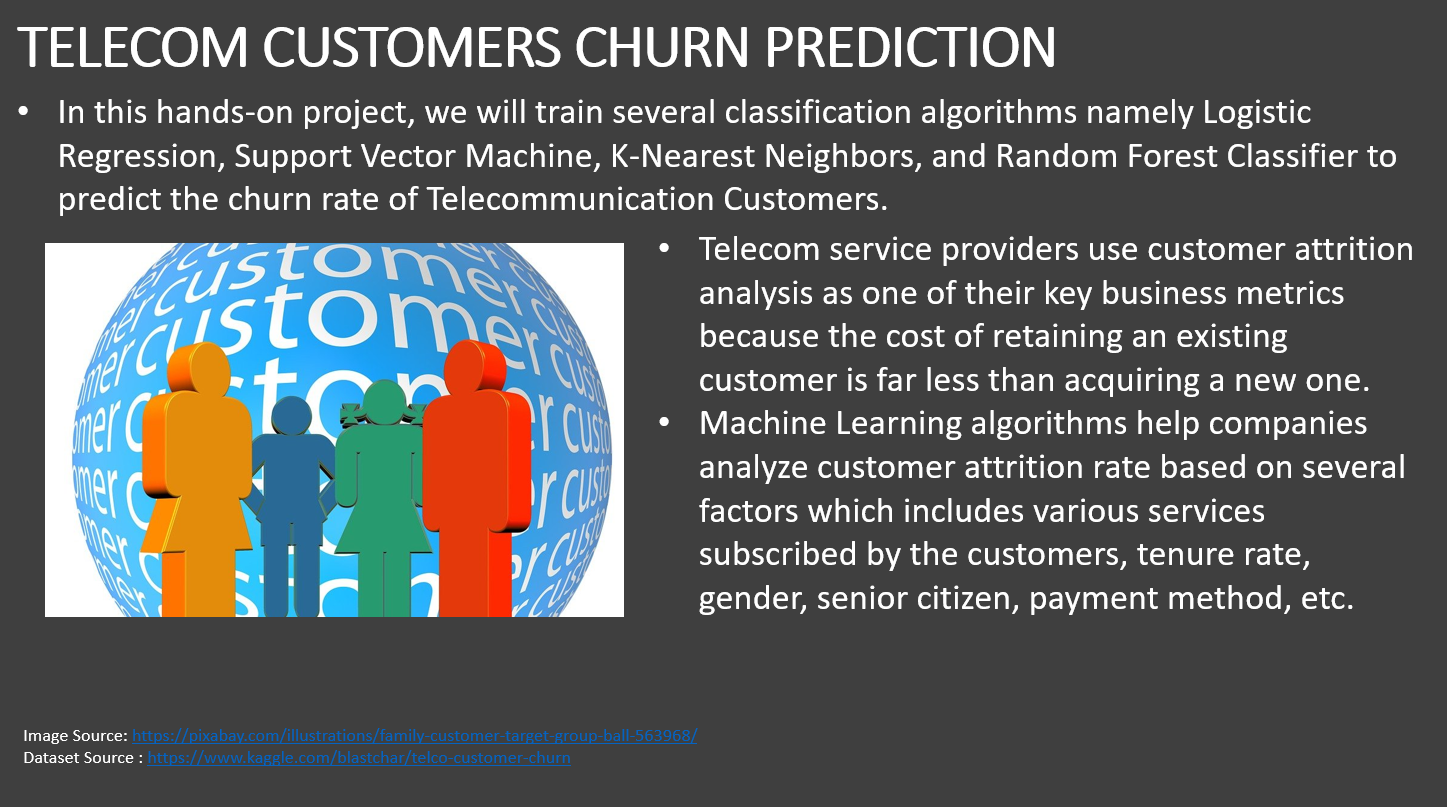

MINI CHALLENGE #1:

- Name top 5 telecom companies in North America in 2020?

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [5]:
# Read the CSV file 
telecom_df = pd.read_csv("telecom_churn.csv")

In [6]:
# Load the top 5 instances
telecom_df.head()

state  account_length  area_code  phone_number  international_plan  \
0     16             128        415          2845                   0   
1     35             107        415          2301                   0   
2     31             137        415          1616                   0   
3     35              84        408          2510                   1   
4     36              75        415           155                   1   

   voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  class  
0                              1      0  
1                              1      0  
2                              0      0  
3                              2      0  
4                              3      0  

[5 rows x 21 columns]

In [7]:
# Load the bottom 5 instances 
telecom_df.tail()

state  account_length  area_code  phone_number  international_plan  \
4995     11              50        408          2000                   0   
4996     49             152        415           394                   0   
4997      7              61        415           313                   0   
4998      7             109        510          3471                   0   
4999     46              86        415          2412                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
4995                1                     40              235.7   
4996                0                      0              184.2   
4997                0                      0              140.6   
4998                0                      0              188.8   
4999                1                     34              129.4   

      total_day_calls  total_day_charge  ...  total_eve_calls  \
4995              127             40.07  ...              126   
4996               90             31.31  ...               73   
4997               89             23.90  ...              128   
4998               67             32.10  ...               92   
4999              102             22.00  ...              104   

      total_eve_charge  total_night_minutes  total_night_calls  \
4995             18.96                297.5                116   
4996             21.83                213.6                113   
4997             14.69                212.4                 97   
4998             14.59                224.4                 89   
4999             22.70                154.8                100   

      total_night_charge  total_intl_minutes  total_intl_calls  \
4995               13.39                 9.9                 5   
4996                9.61                14.7                 2   
4997                9.56                13.6                 4   
4998               10.10                 8.5                 6   
4999                6.97                 9.3                16   

      total_intl_charge  number_customer_service_calls  class  
4995               2.67                              2      0  
4996               3.97                              3      1  
4997               3.67                              1      0  
4998               2.30                              0      0  
4999               2.51                              0      0  

[5 rows x 21 columns]

In [8]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [9]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [10]:
# Obtain the summary of the dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

MINI CHALLENGE #2:
- What is the maximum and average daily minutes?

In [18]:
telecom_df.describe()

state  account_length    area_code  phone_number  \
count  5000.00000      5000.00000  5000.000000   5000.000000   
mean     25.99840       100.25860   436.911400   2499.500000   
std      14.80348        39.69456    42.209182   1443.520003   
min       0.00000         1.00000   408.000000      0.000000   
25%      13.00000        73.00000   408.000000   1249.750000   
50%      26.00000       100.00000   415.000000   2499.500000   
75%      39.00000       127.00000   415.000000   3749.250000   
max      50.00000       243.00000   510.000000   4999.000000   

       international_plan  voice_mail_plan  number_vmail_messages  \
count         5000.000000      5000.000000            5000.000000   
mean             0.094600         0.264600               7.755200   
std              0.292691         0.441164              13.546393   
min              0.000000         0.000000               0.000000   
25%              0.000000         0.000000               0.000000   
50%              0.000000         0.000000               0.000000   
75%              0.000000         1.000000              17.000000   
max              1.000000         1.000000              52.000000   

       total_day_minutes  total_day_calls  total_day_charge  ...  \
count        5000.000000      5000.000000       5000.000000  ...   
mean          180.288900       100.029400         30.649668  ...   
std            53.894699        19.831197          9.162069  ...   
min             0.000000         0.000000          0.000000  ...   
25%           143.700000        87.000000         24.430000  ...   
50%           180.100000       100.000000         30.620000  ...   
75%           216.200000       113.000000         36.750000  ...   
max           351.500000       165.000000         59.760000  ...   

       total_eve_calls  total_eve_charge  total_night_minutes  \
count      5000.000000       5000.000000          5000.000000   
mean        100.191000         17.054322           200.391620   
std          19.826496          4.296843            50.527789   
min           0.000000          0.000000             0.000000   
25%          87.000000         14.140000           166.900000   
50%         100.000000         17.090000           200.400000   
75%         114.000000         19.900000           234.700000   
max         170.000000         30.910000           395.000000   

       total_night_calls  total_night_charge  total_intl_minutes  \
count        5000.000000         5000.000000         5000.000000   
mean           99.919200            9.017732           10.261780   
std            19.958686            2.273763            2.761396   
min             0.000000            0.000000            0.000000   
25%            87.000000            7.510000            8.500000   
50%           100.000000            9.020000           10.300000   
75%           113.000000           10.560000           12.000000   
max           175.000000           17.770000           20.000000   

       total_intl_calls  total_intl_charge  number_customer_service_calls  \
count       5000.000000        5000.000000                    5000.000000   
mean           4.435200           2.771196                       1.570400   
std            2.456788           0.745514                       1.306363   
min            0.000000           0.000000                       0.000000   
25%            3.000000           2.300000                       1.000000   
50%            4.000000           2.780000                       1.000000   
75%            6.000000           3.240000                       2.000000   
max           20.000000           5.400000                       9.000000   

             class  
count  5000.000000  
mean      0.141400  
std       0.348469  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

# TASK #3: PERFORM DATA VISUALIZATION

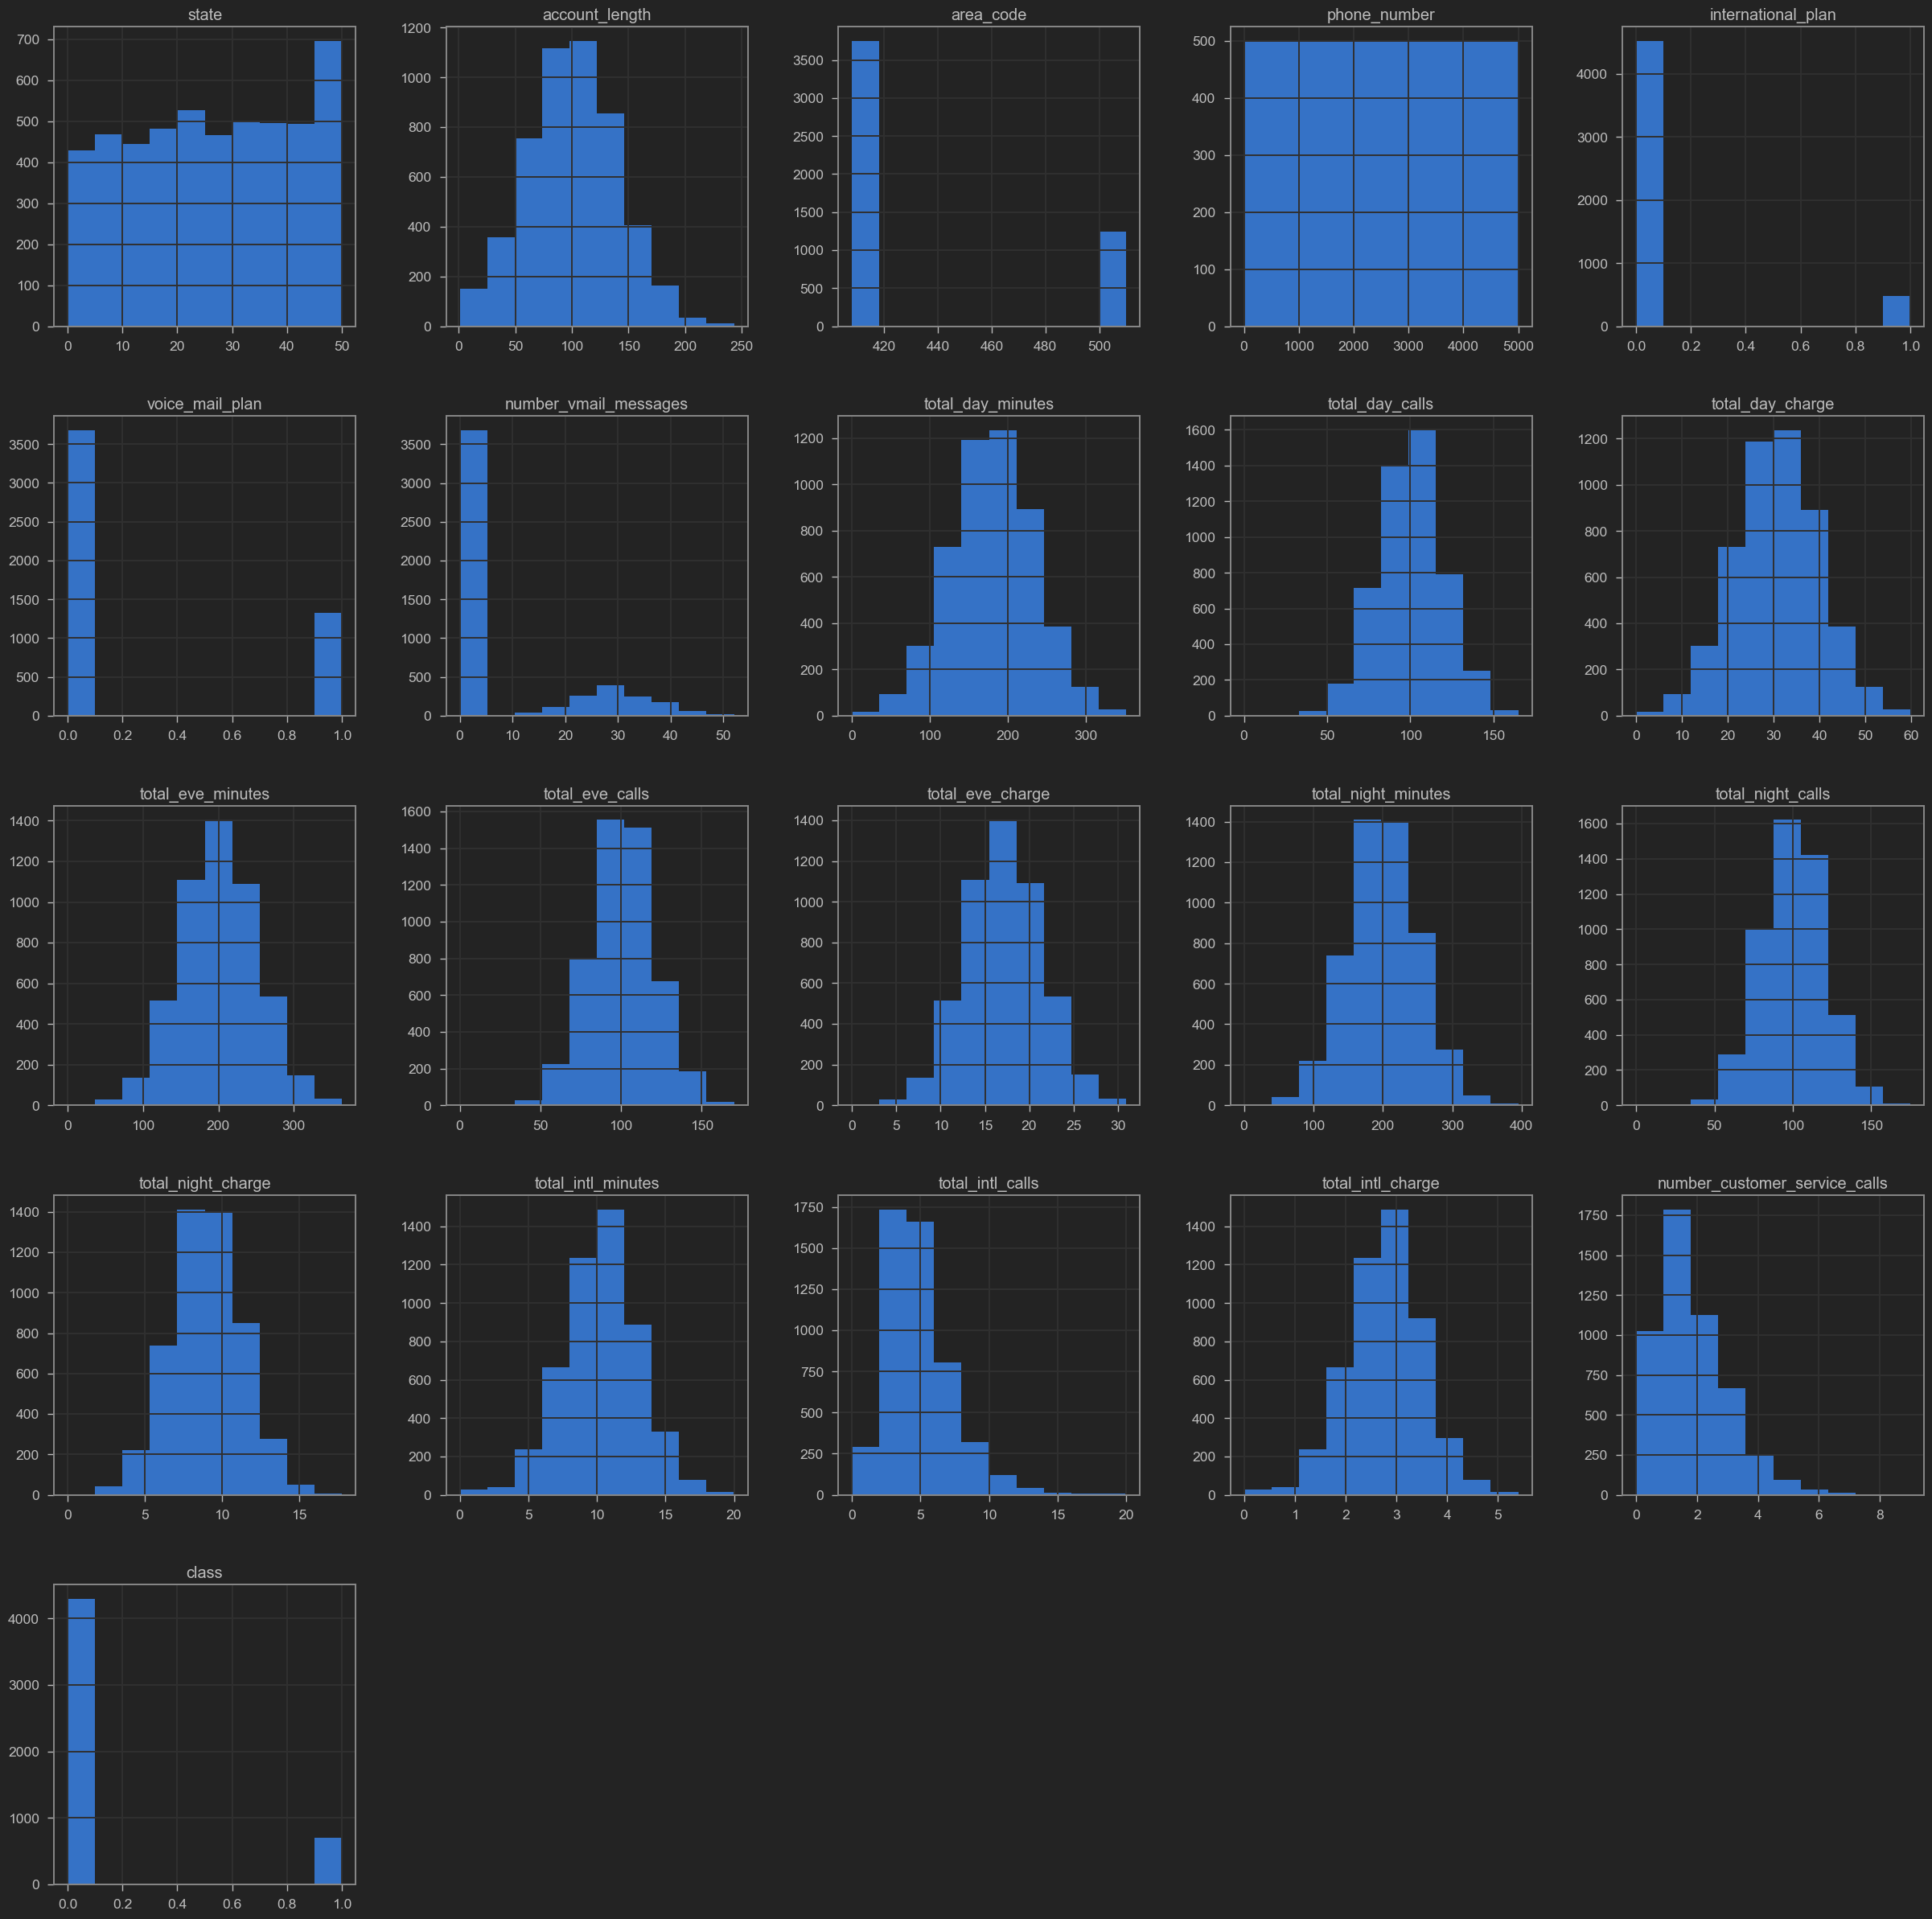

In [11]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [12]:
telecom_df["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [13]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = ["Exited (1)", "Retained (0)"], values = telecom_df["class"].value_counts())])
fig.show()

In [14]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained

fig = px.histogram(telecom_df, x = "international_plan",
                  color = "class",
                  title = "International Plan service opted by the Telecom Customers")
fig.show()

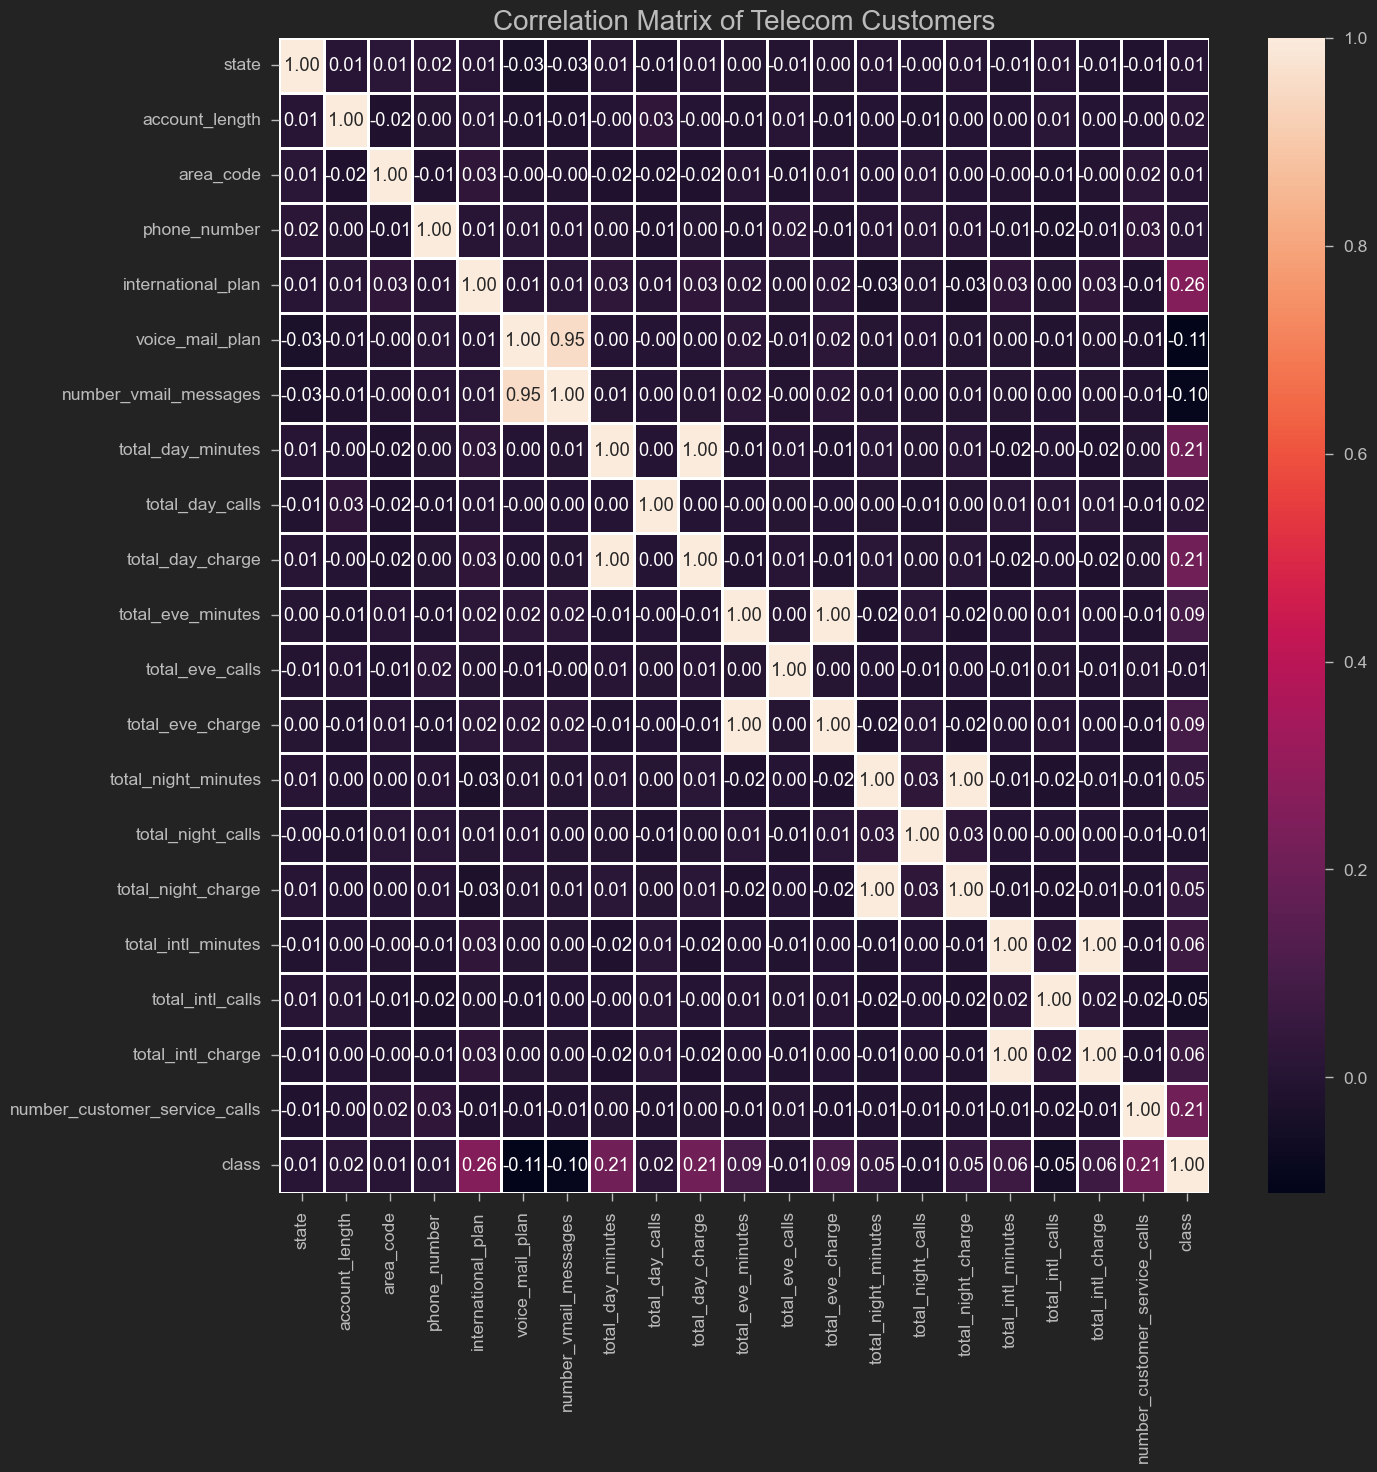

In [15]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

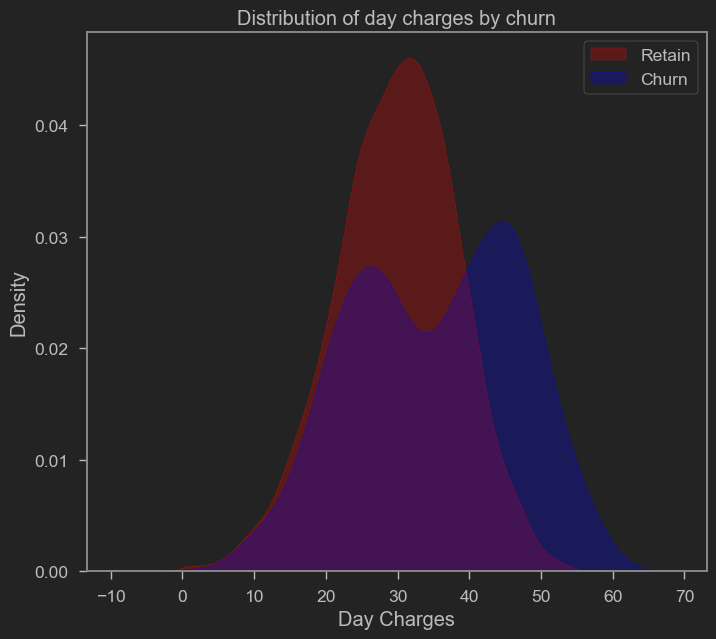

In [16]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

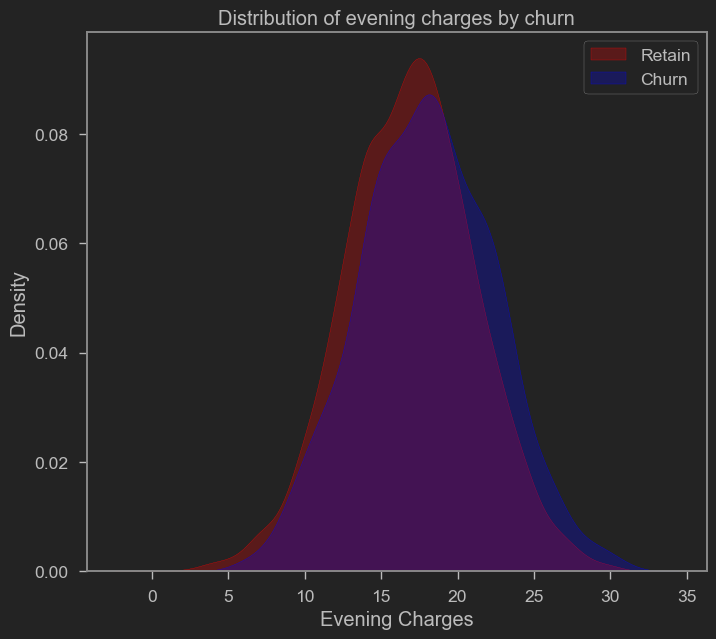

In [17]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

MINI CHALLENGE #3:

- Plot the plotly histogram on voice mail plan correlated with Churn feature

In [23]:
fig = px.histogram(telecom_df, x = "voice_mail_plan",
                  color = "class",
                  title = "Voice mail plan opted by the Telecom Customers")
fig.show()

# TASK #4: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [19]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [20]:
X.shape

(5000, 18)

In [21]:
y.shape

(5000,)

In [22]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

MINI CHALLENGE #4:
- Verify that the train/test split was successfull 

In [24]:
for i in [X_train, y_train, X_test, y_test]:
    print (i.shape)

(3500, 18)
(3500,)
(1500, 18)
(1500,)


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

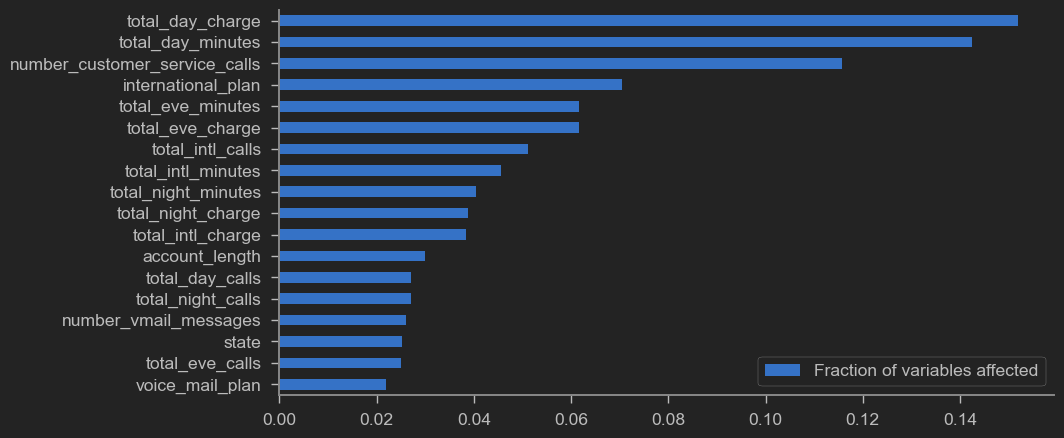

In [26]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [27]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# TASK #5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

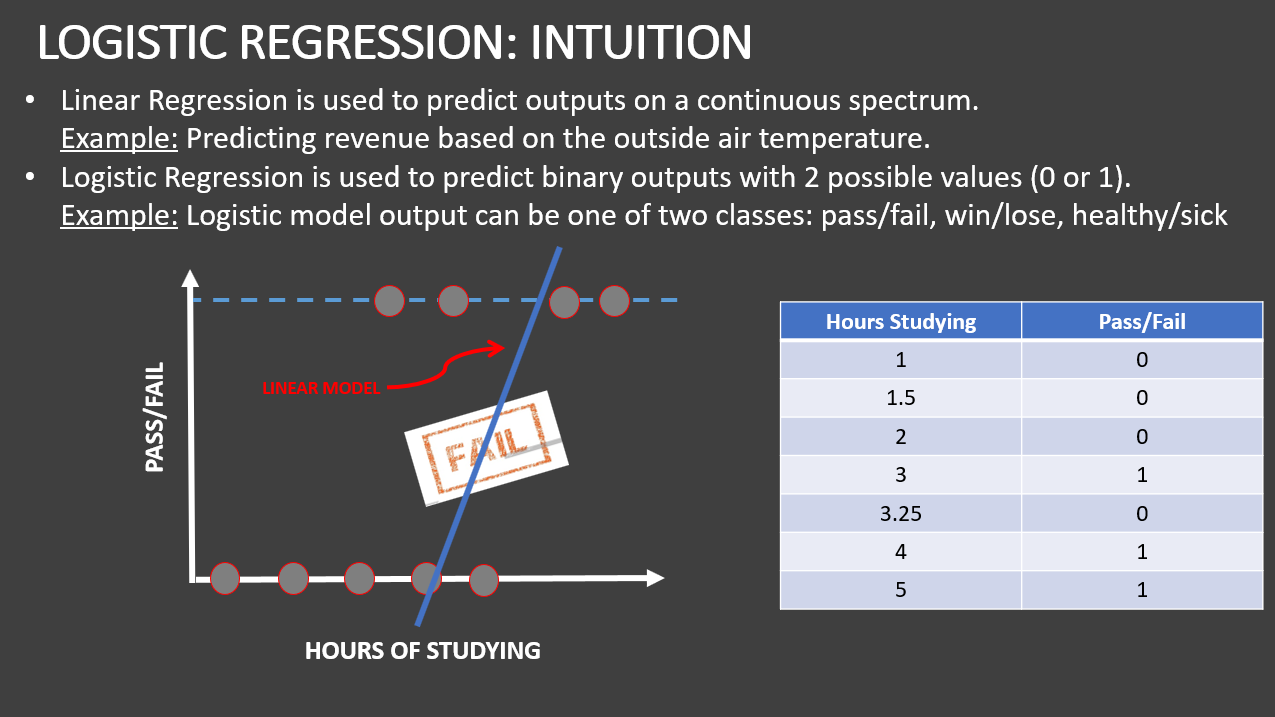

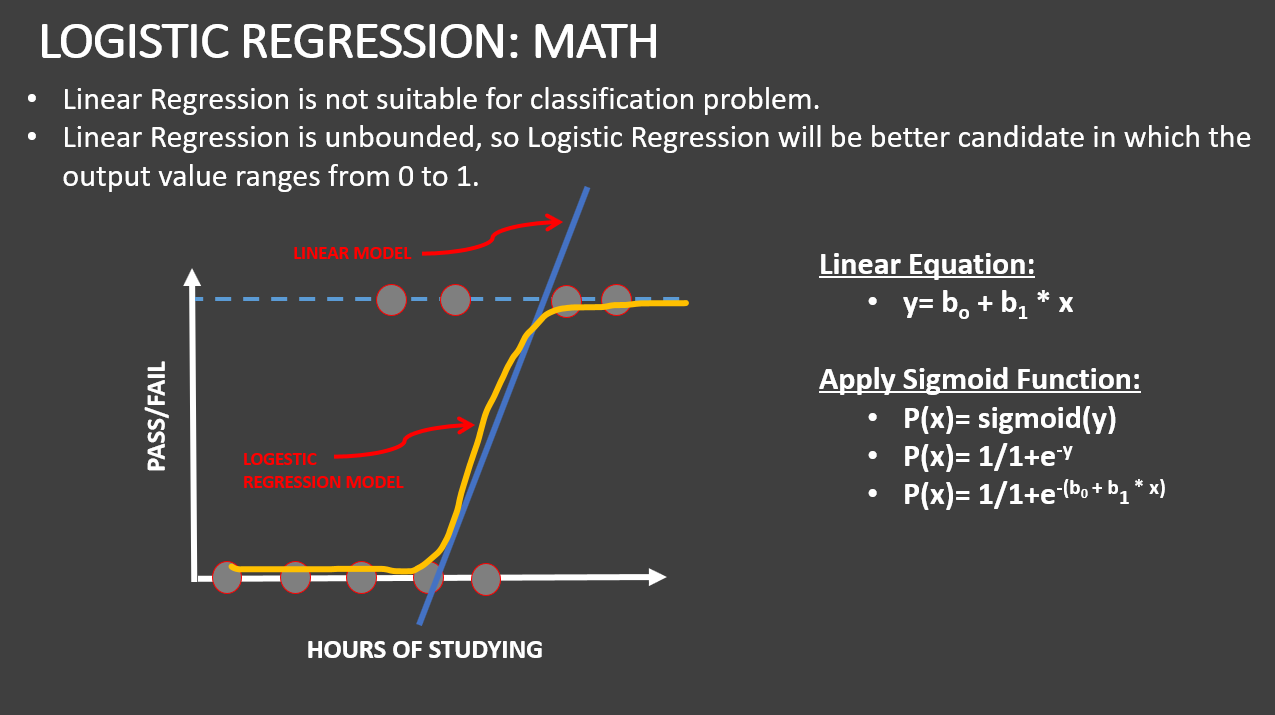

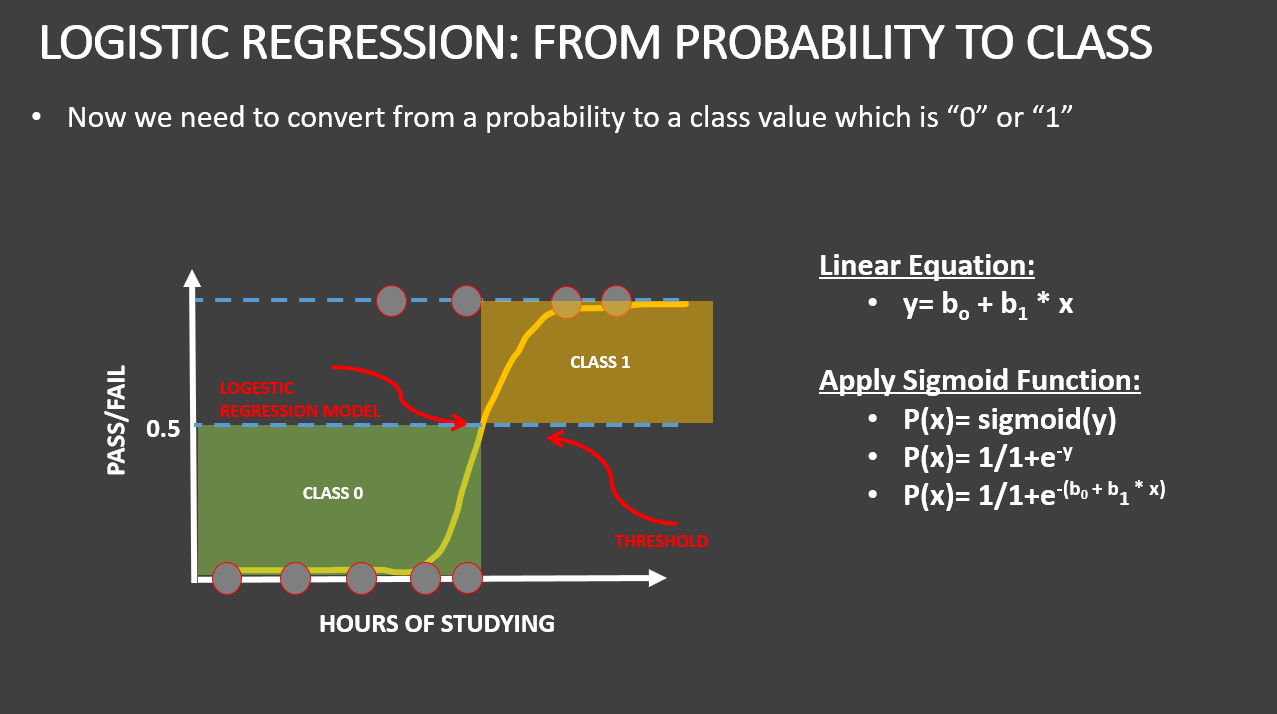

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
        
model_LR.fit(X_train, y_train)

C:\Users\Walt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [29]:
y_predict = model_LR.predict(X_test)

In [30]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.40      0.08      0.14       201

    accuracy                           0.86      1500
   macro avg       0.63      0.53      0.53      1500
weighted avg       0.81      0.86      0.82      1500



MINI CHALLENGE #5:
- Print out the confusion Matrix and comment on the results. 


<AxesSubplot:>

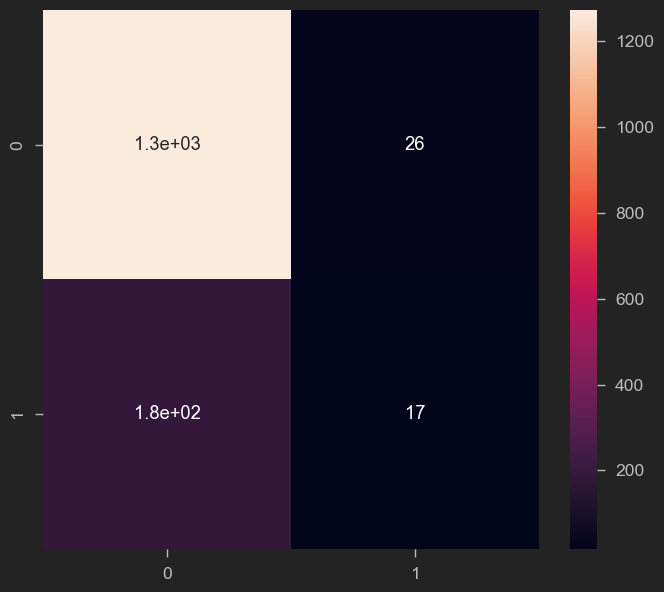

In [31]:
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

# TASK #6: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

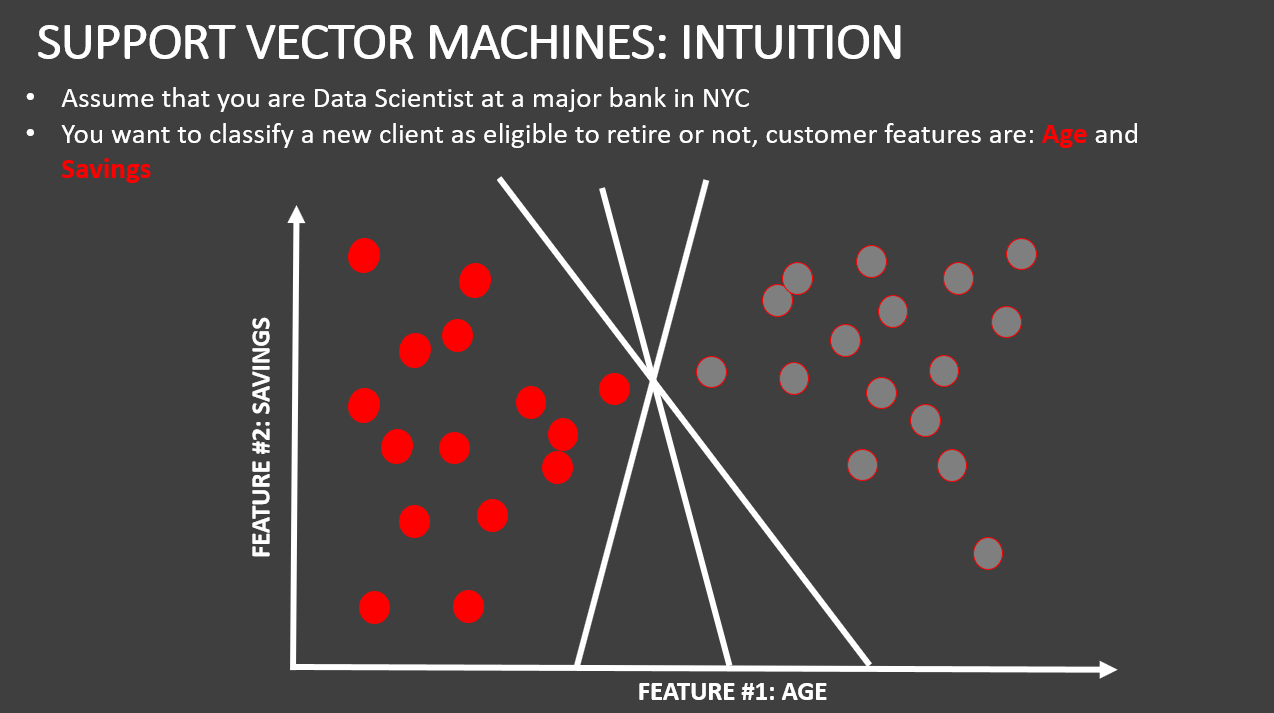

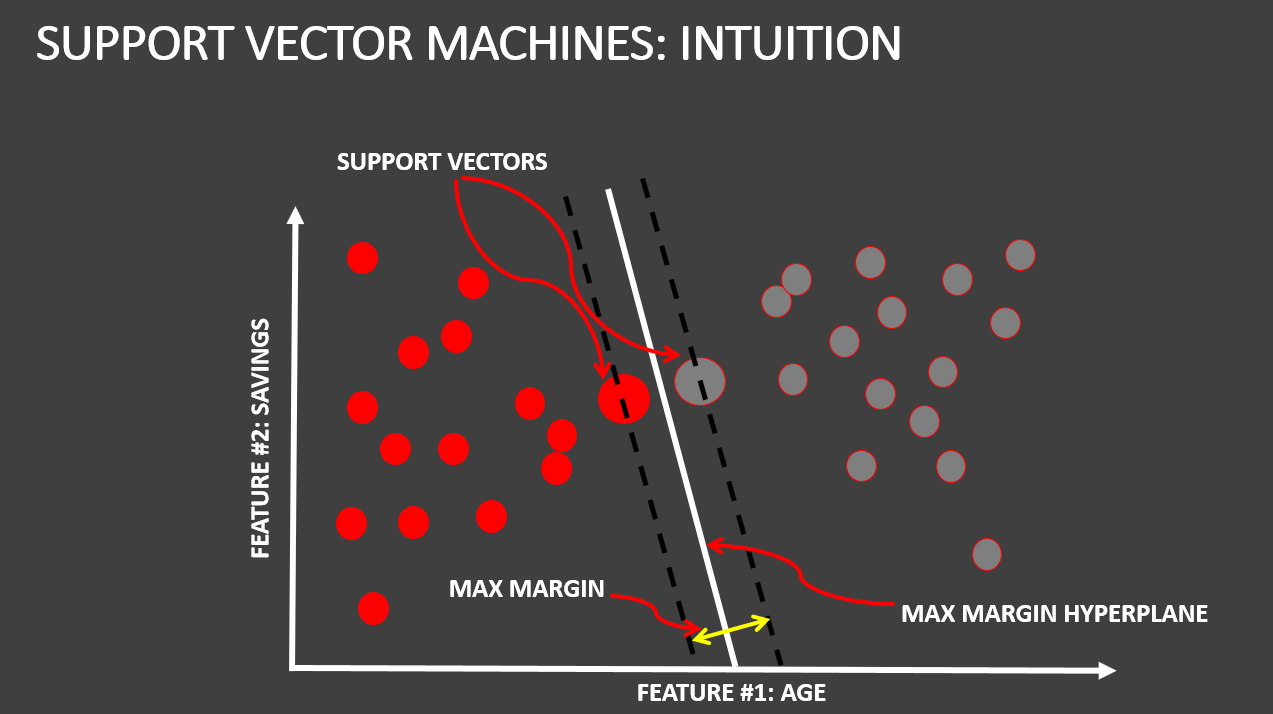

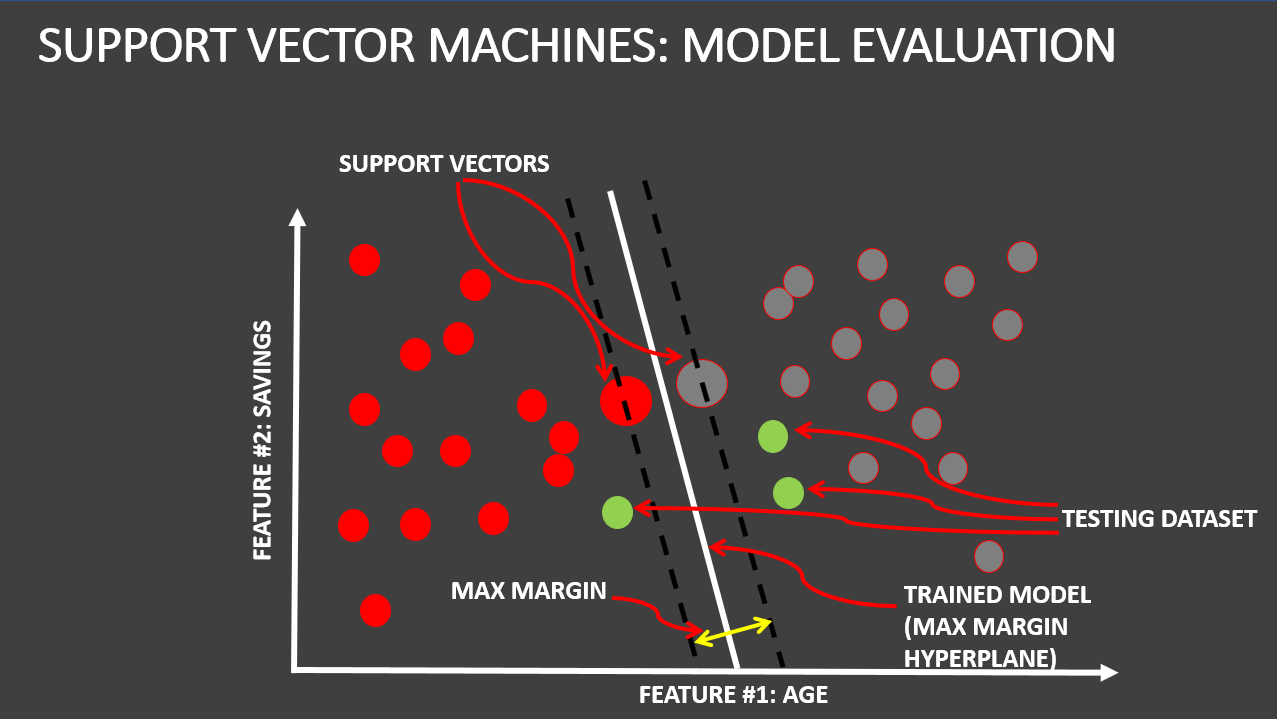

In [32]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(X_train, y_train)

C:\Users\Walt\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Walt\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Walt\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Walt\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Walt\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [33]:
y_predict = model_svm.predict(X_test)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1299
           1       0.49      0.16      0.24       201

    accuracy                           0.87      1500
   macro avg       0.69      0.57      0.58      1500
weighted avg       0.83      0.87      0.83      1500



<AxesSubplot:>

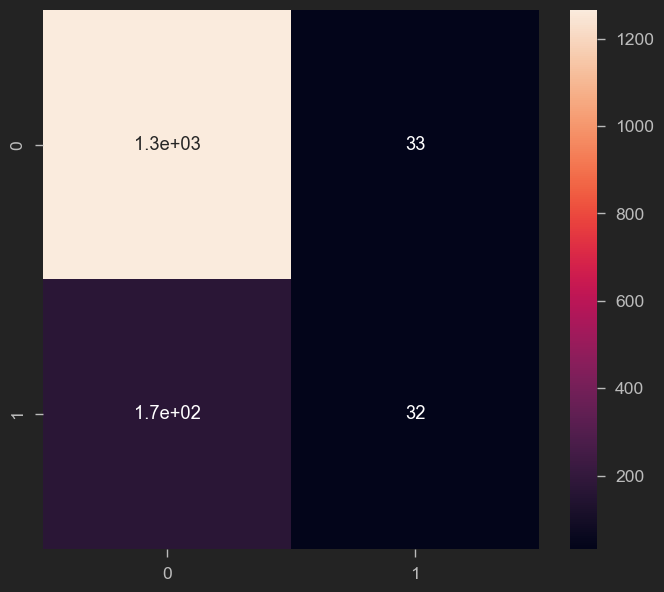

In [35]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #7: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

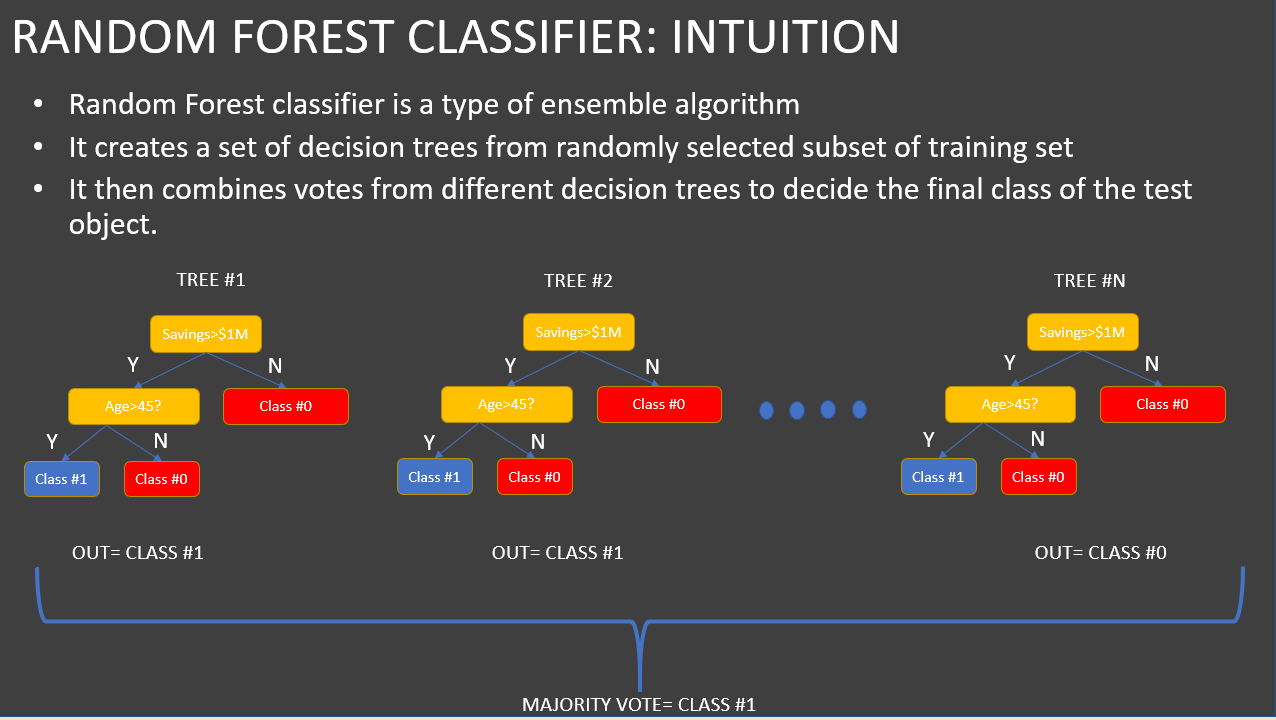

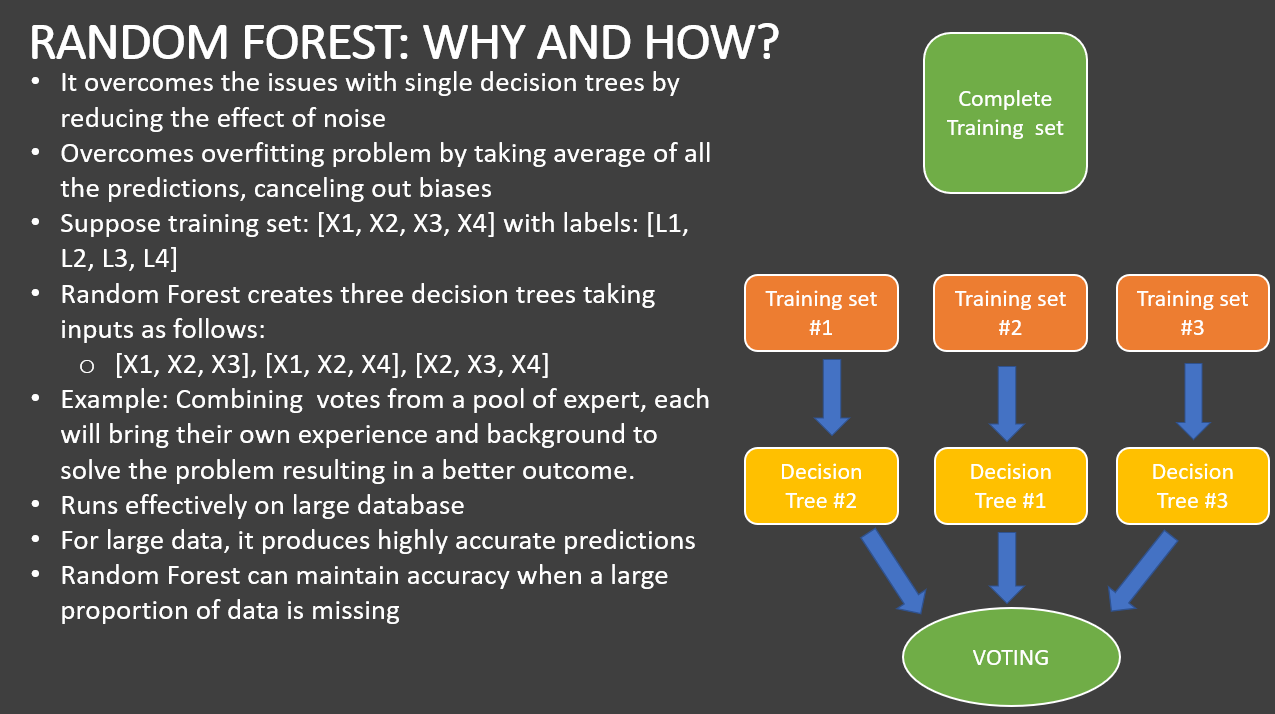

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_predict = model_rf.predict(X_test)

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.76      0.84       201

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

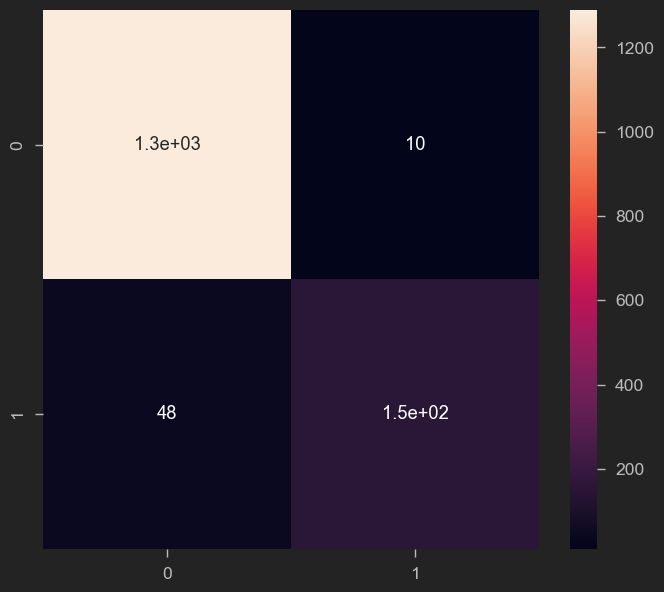

In [39]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #8: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

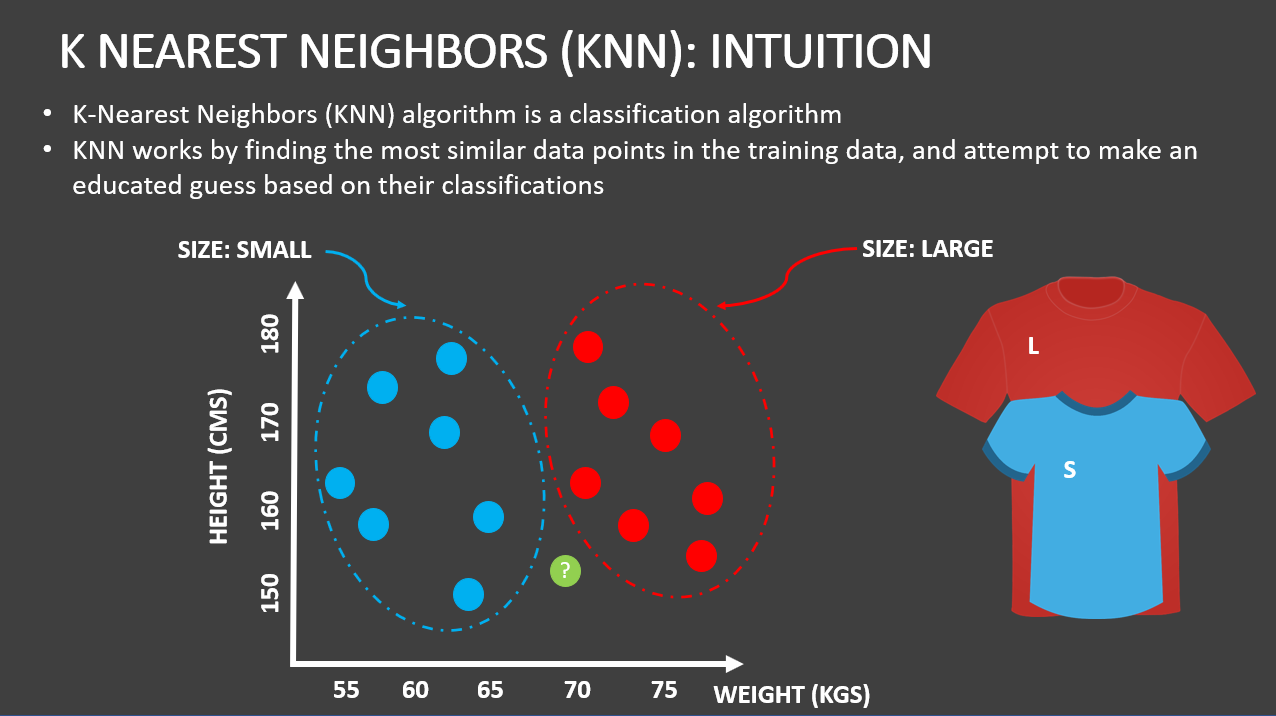

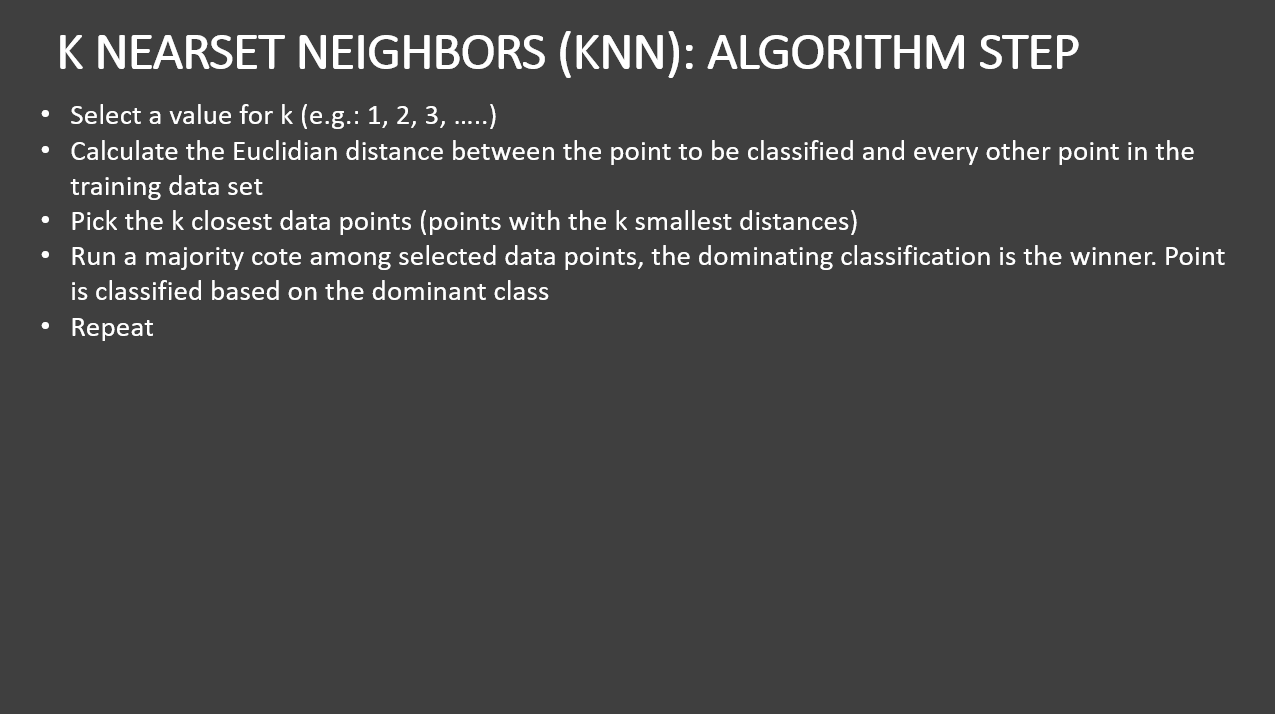

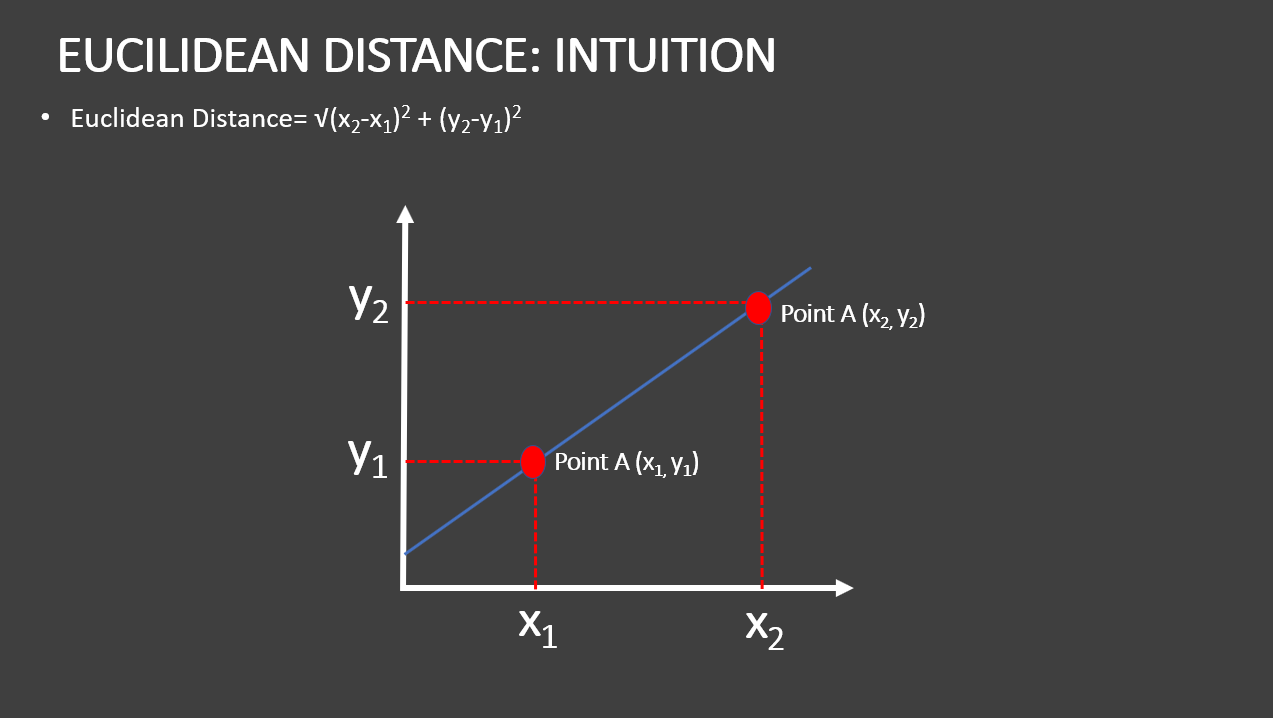

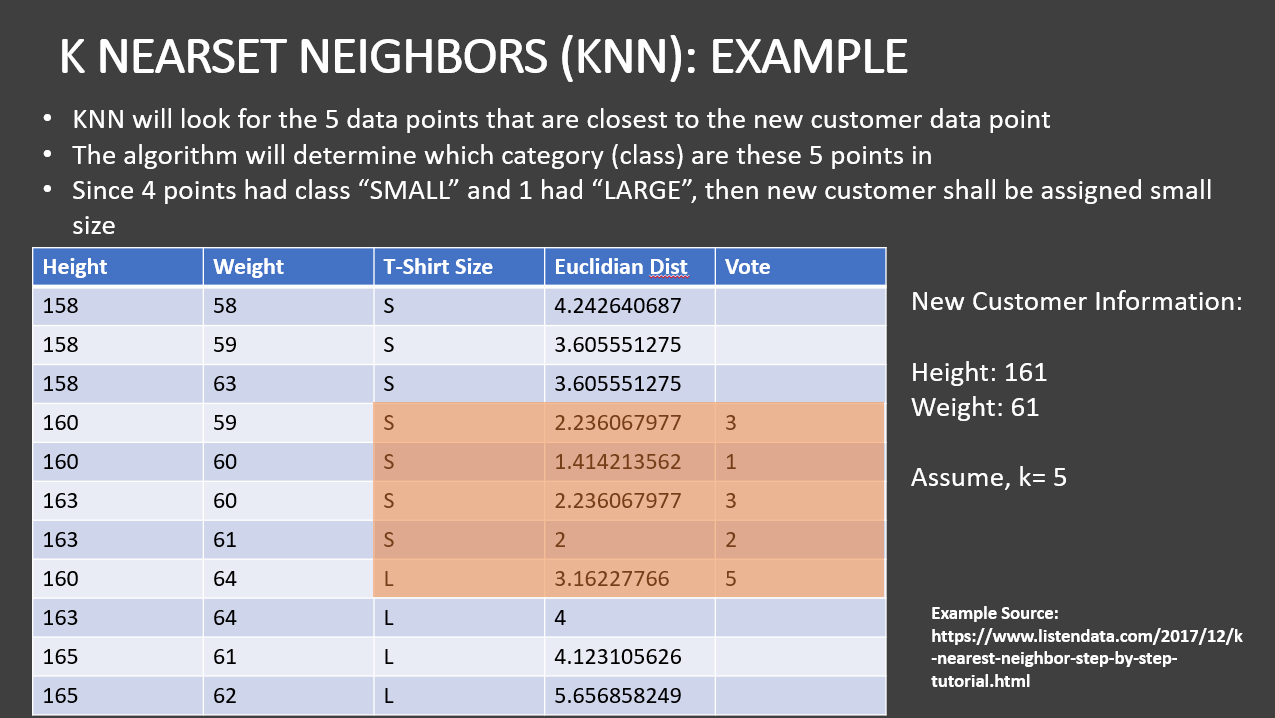

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_predict = model_knn.predict(X_test) 

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<AxesSubplot:>

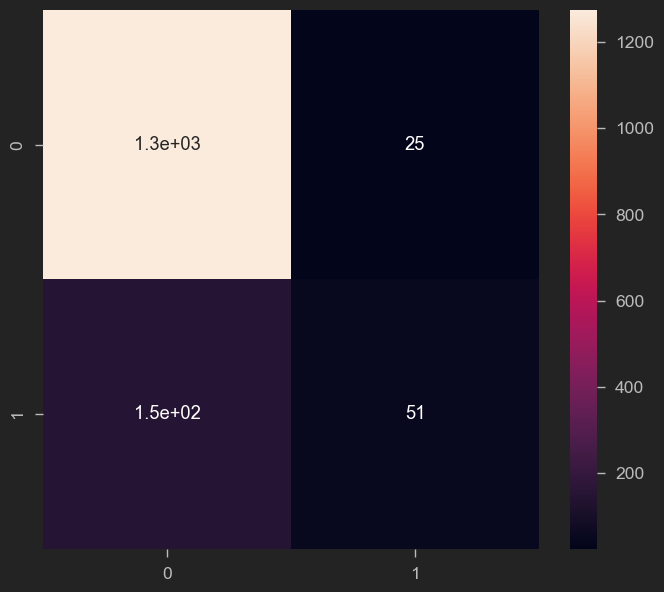

In [43]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

MINI CHALLENGE #6:

Which of the following answers represents the Euclidean distance between the two points A(1, 3) and B(2, 3)?

1. 2
2. 4
3. 1
4. 8

sqrt((1-2)^2 + (3-3)^2)= 1

# TASK #9: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

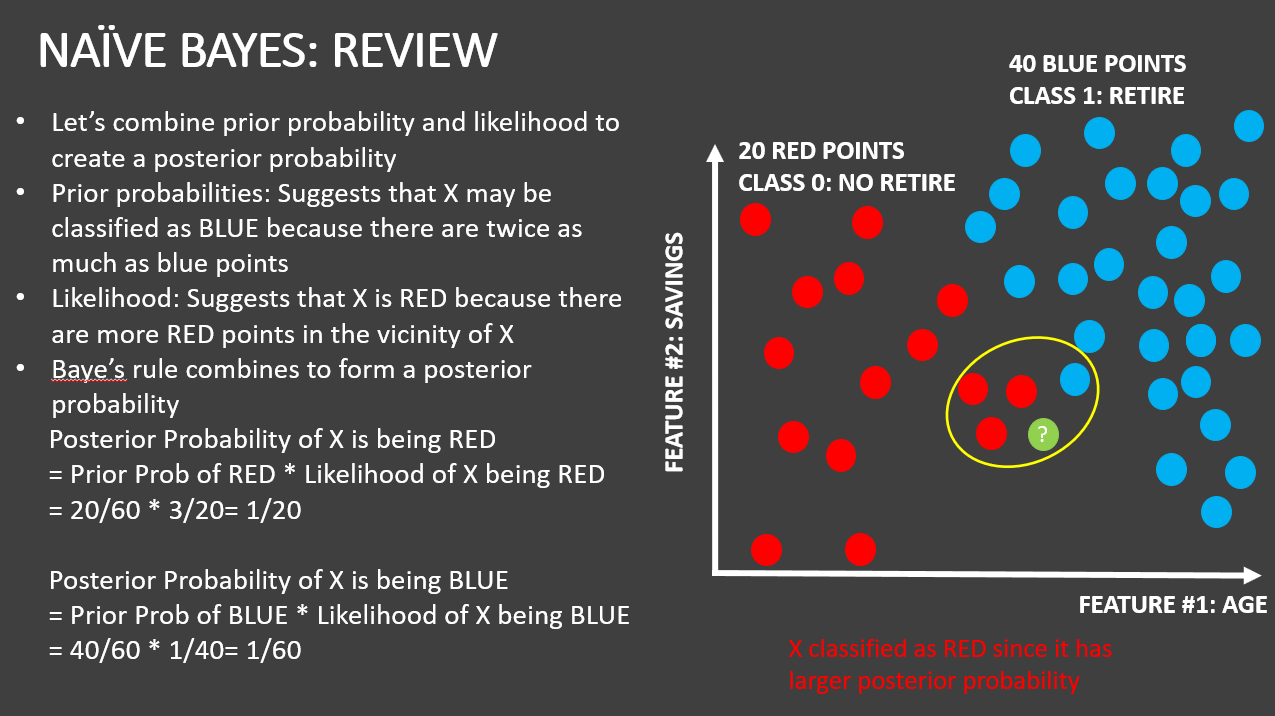

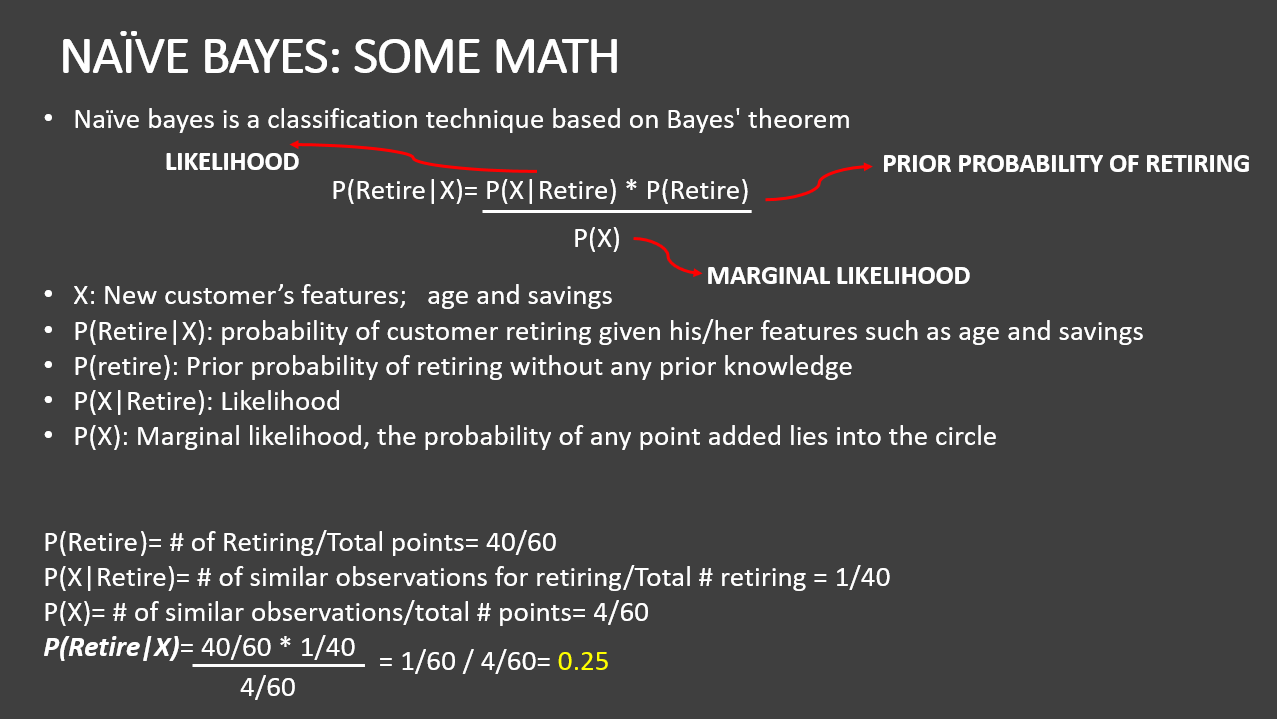

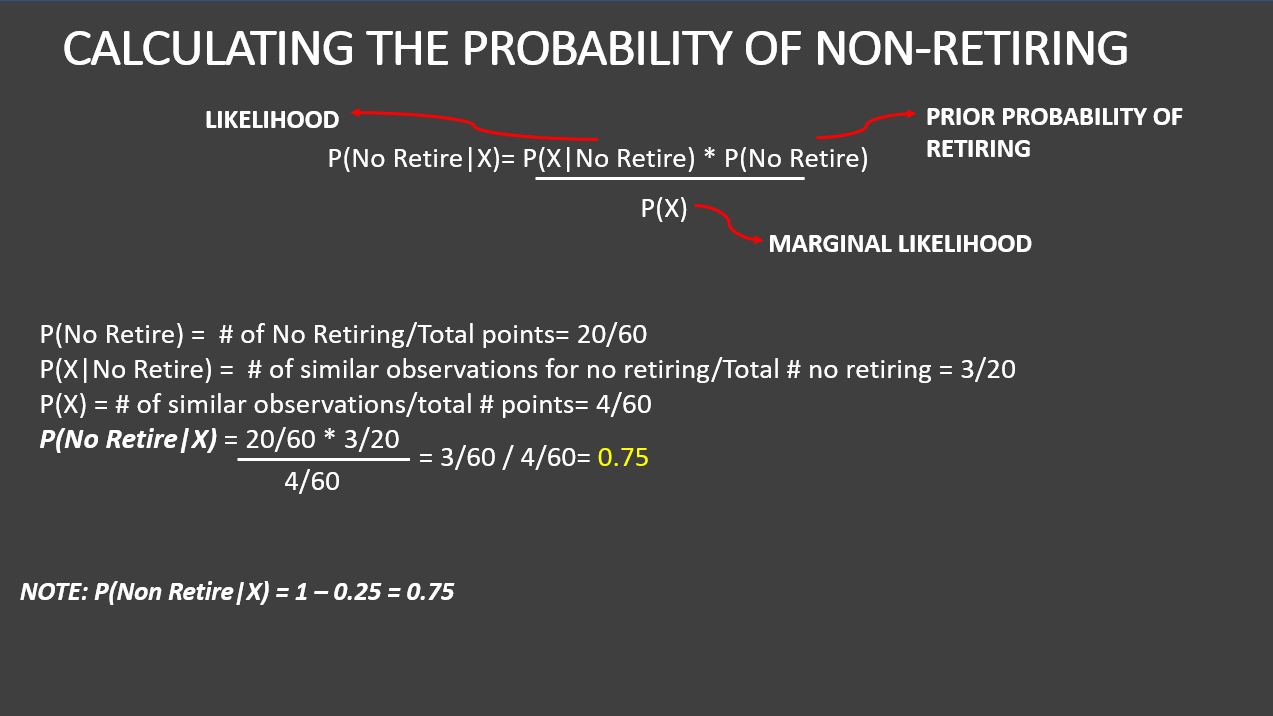

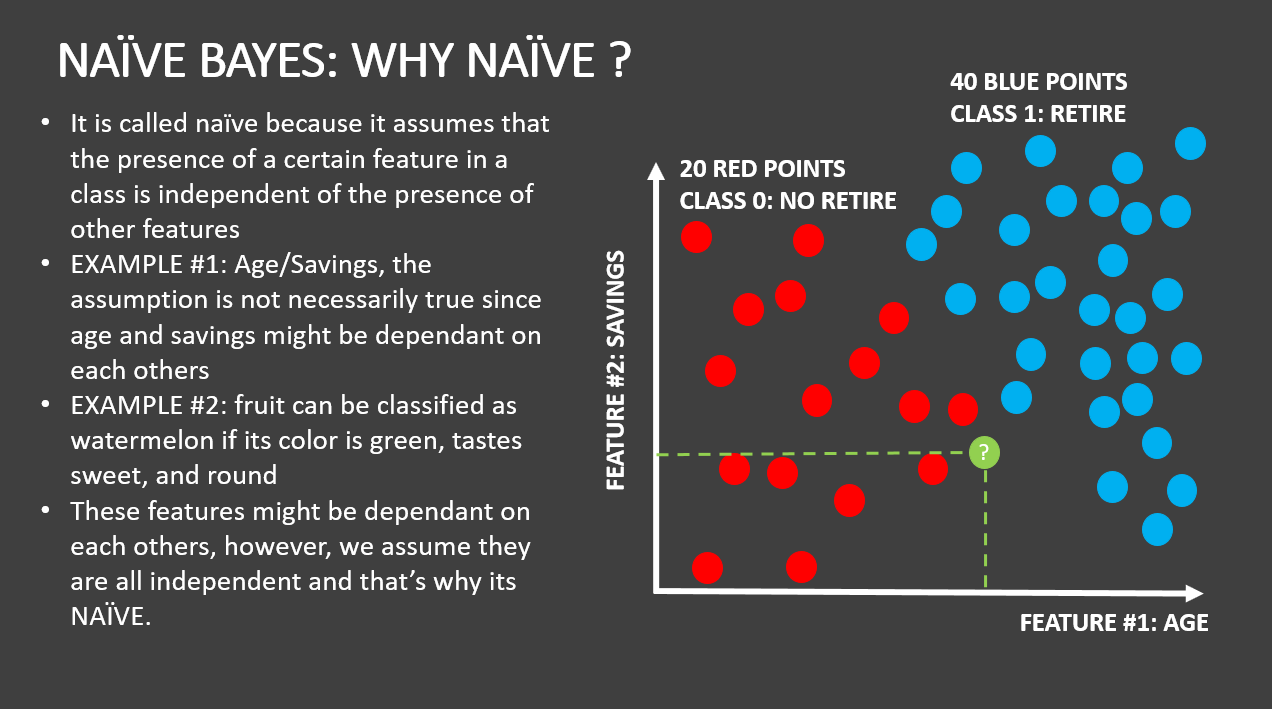

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [47]:
y_predict = model_gnb.predict(X_test)

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<AxesSubplot:>

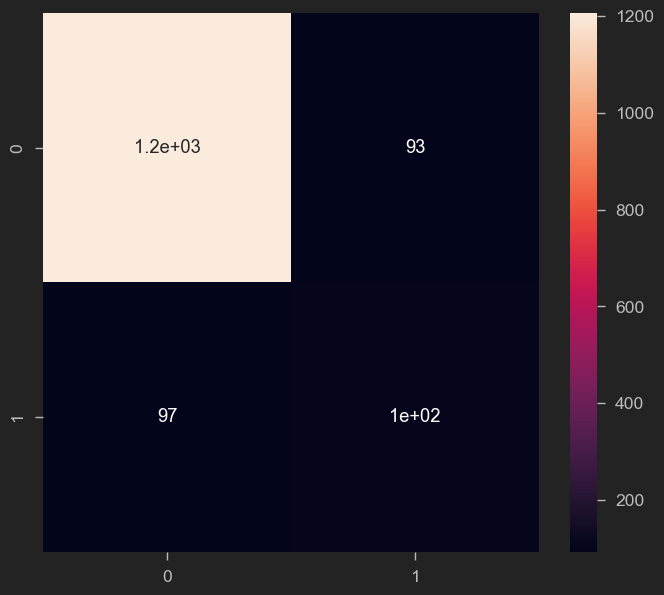

In [49]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# TASK #10: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

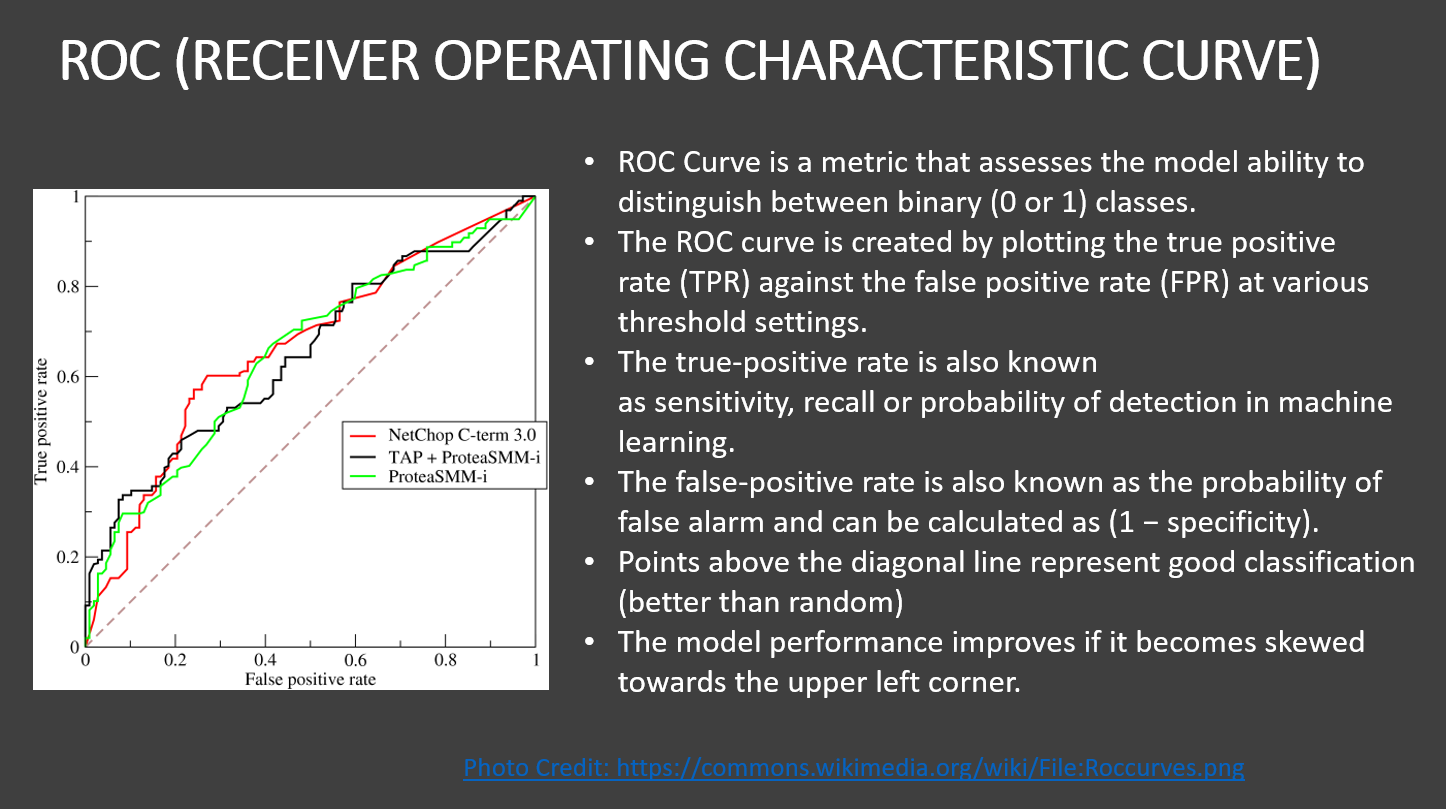

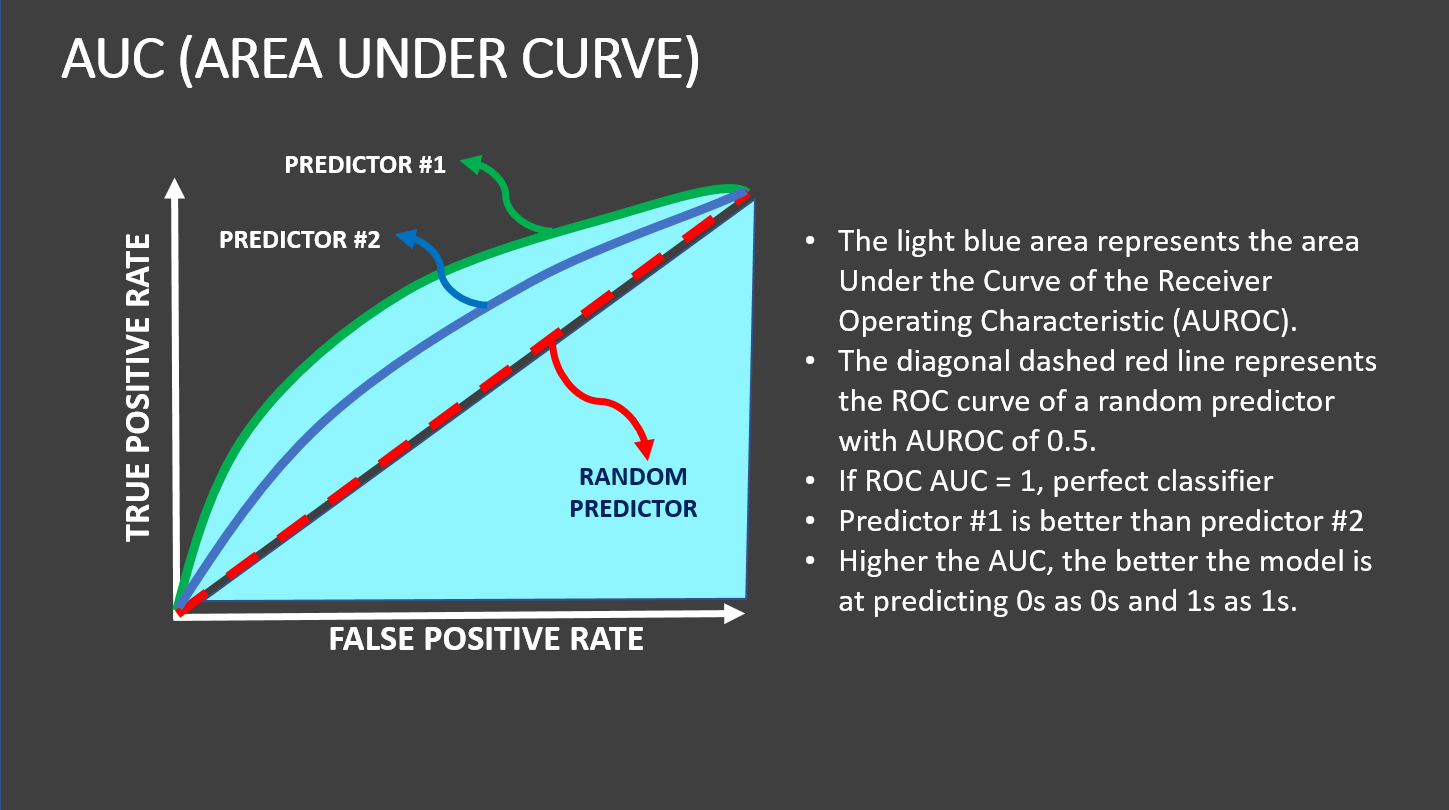

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [50]:
model_LR.predict_proba(X_test)

array([[0.97318547, 0.02681453],
       [0.91850231, 0.08149769],
       [0.9047451 , 0.0952549 ],
       ...,
       [0.92607292, 0.07392708],
       [0.93989592, 0.06010408],
       [0.97487073, 0.02512927]])

In [51]:
model_LR.predict_proba(X_test)[:, 1]

array([0.02681453, 0.08149769, 0.0952549 , ..., 0.07392708, 0.06010408,
       0.02512927])

In [52]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [53]:
from sklearn.metrics import roc_curve


In [54]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [55]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 2.30946882e-03,
       2.30946882e-03, 4.61893764e-03, 4.61893764e-03, 6.15858353e-03,
       6.15858353e-03, 6.92840647e-03, 6.92840647e-03, 8.46805235e-03,
       8.46805235e-03, 1.15473441e-02, 1.15473441e-02, 1.53964588e-02,
       1.53964588e-02, 1.69361047e-02, 1.69361047e-02, 1.77059276e-02,
       1.77059276e-02, 1.92455735e-02, 1.92455735e-02, 2.00153965e-02,
       2.00153965e-02, 2.07852194e-02, 2.07852194e-02, 2.15550423e-02,
       2.15550423e-02, 2.38645112e-02, 2.38645112e-02, 2.46343341e-02,
       2.46343341e-02, 2.77136259e-02, 2.77136259e-02, 3.15627406e-02,
       3.15627406e-02, 3.23325635e-02, 3.23325635e-02, 3.46420323e-02,
       3.46420323e-02, 4.31100847e-02, 4.31100847e-02, 4.46497306e-02,
       4.46497306e-02, 4.54195535e-02, 4.54195535e-02, 4.61893764e-02,
       4.61893764e-02, 5.15781370e-02, 5.15781370e-02, 5.38876059e-02,
       5.38876059e-02, 5.61970747e-02, 5.61970747e-02, 5.69668976e-02,
      

In [56]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.01492537,
       0.01492537, 0.0199005 , 0.0199005 , 0.02487562, 0.02487562,
       0.02985075, 0.02985075, 0.039801  , 0.039801  , 0.04477612,
       0.04477612, 0.05472637, 0.05472637, 0.06965174, 0.06965174,
       0.07462687, 0.07462687, 0.08457711, 0.08457711, 0.08955224,
       0.08955224, 0.09452736, 0.09452736, 0.09950249, 0.09950249,
       0.10447761, 0.10447761, 0.10945274, 0.10945274, 0.11442786,
       0.11442786, 0.11940299, 0.11940299, 0.12935323, 0.12935323,
       0.13432836, 0.13432836, 0.15422886, 0.15422886, 0.15920398,
       0.15920398, 0.1641791 , 0.1641791 , 0.16915423, 0.16915423,
       0.17910448, 0.17910448, 0.2039801 , 0.2039801 , 0.20895522,
       0.20895522, 0.21393035, 0.21393035, 0.21890547, 0.21890547,
       0.2238806 , 0.2238806 , 0.23383085, 0.23383085, 0.23880597,
       0.23880597, 0.24875622, 0.24875622, 0.25870647, 0.25870647,
       0.26368159, 0.26368159, 0.26865672, 0.26865672, 0.27363

In [57]:
thresh1

array([1.84400535, 0.84400535, 0.83644958, 0.77772677, 0.75898447,
       0.72947508, 0.72768146, 0.69759759, 0.68427413, 0.68100667,
       0.67931578, 0.66613227, 0.64421901, 0.59992   , 0.59472018,
       0.55308333, 0.53472757, 0.52923533, 0.52167267, 0.51794359,
       0.51165163, 0.50840187, 0.50130878, 0.50042276, 0.49821622,
       0.49733543, 0.49494402, 0.49404822, 0.4885226 , 0.48281056,
       0.47859517, 0.47734058, 0.47697696, 0.46622412, 0.4661175 ,
       0.44961539, 0.44902439, 0.44340484, 0.42980803, 0.42491883,
       0.42300414, 0.40651504, 0.39744442, 0.392098  , 0.39132182,
       0.38744203, 0.38737492, 0.38716858, 0.38695013, 0.38085384,
       0.37871414, 0.37392623, 0.37050086, 0.36657114, 0.36618721,
       0.36485803, 0.36445726, 0.352261  , 0.35185282, 0.34241811,
       0.34181521, 0.3398228 , 0.33891461, 0.33813249, 0.33653287,
       0.33521825, 0.3339204 , 0.32826838, 0.32542568, 0.32499918,
       0.32417501, 0.32050263, 0.32046827, 0.31870737, 0.31826

In [58]:
# ROC curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [59]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6962454854288986
Support Vector Machine:  0.8149552468603862
Random Forest:  0.9120448565486654
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


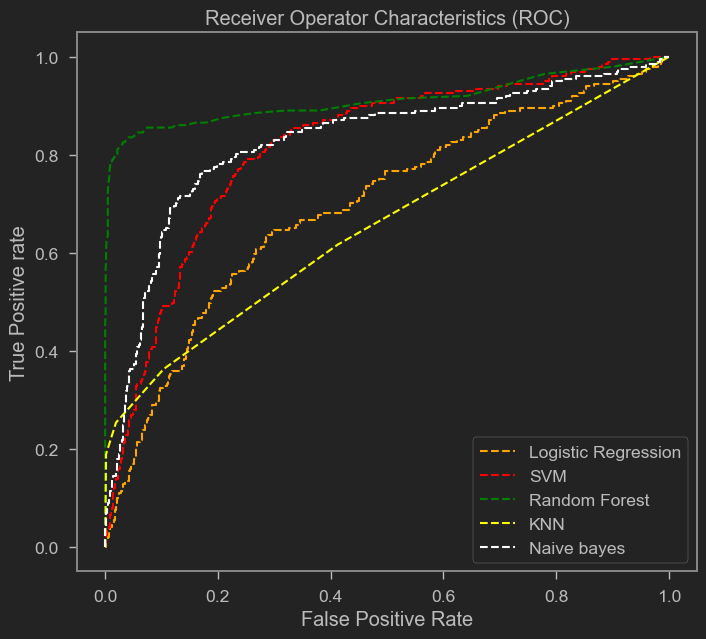

In [60]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

# TASK #11: CONCLUSION & PROJECT RECAP

In [61]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.94      0.76      0.84       201

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# GREAT JOB!

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1 SOLUTION:

- Name top 5 telecom companies in North America in 2020?

1. AT&T
2. Verizon
3. Comcast
4. Time Warner Cable
5. Bell

https://www.businesschief.com/technology-and-ai/top-five-telecom-giants-north-america

MINI CHALLENGE #2 SOLUTION:
- What is the maximum and average daily minutes?

In [56]:
# Display the statistical details of the dataframe
telecom_df.describe()

state  account_length    area_code  phone_number  \
count  5000.00000      5000.00000  5000.000000   5000.000000   
mean     25.99840       100.25860   436.911400   2499.500000   
std      14.80348        39.69456    42.209182   1443.520003   
min       0.00000         1.00000   408.000000      0.000000   
25%      13.00000        73.00000   408.000000   1249.750000   
50%      26.00000       100.00000   415.000000   2499.500000   
75%      39.00000       127.00000   415.000000   3749.250000   
max      50.00000       243.00000   510.000000   4999.000000   

       international_plan  voice_mail_plan  number_vmail_messages  \
count         5000.000000      5000.000000            5000.000000   
mean             0.094600         0.264600               7.755200   
std              0.292691         0.441164              13.546393   
min              0.000000         0.000000               0.000000   
25%              0.000000         0.000000               0.000000   
50%              0.000000         0.000000               0.000000   
75%              0.000000         1.000000              17.000000   
max              1.000000         1.000000              52.000000   

       total_day_minutes  total_day_calls  total_day_charge  ...  \
count        5000.000000      5000.000000       5000.000000  ...   
mean          180.288900       100.029400         30.649668  ...   
std            53.894699        19.831197          9.162069  ...   
min             0.000000         0.000000          0.000000  ...   
25%           143.700000        87.000000         24.430000  ...   
50%           180.100000       100.000000         30.620000  ...   
75%           216.200000       113.000000         36.750000  ...   
max           351.500000       165.000000         59.760000  ...   

       total_eve_calls  total_eve_charge  total_night_minutes  \
count      5000.000000       5000.000000          5000.000000   
mean        100.191000         17.054322           200.391620   
std          19.826496          4.296843            50.527789   
min           0.000000          0.000000             0.000000   
25%          87.000000         14.140000           166.900000   
50%         100.000000         17.090000           200.400000   
75%         114.000000         19.900000           234.700000   
max         170.000000         30.910000           395.000000   

       total_night_calls  total_night_charge  total_intl_minutes  \
count        5000.000000         5000.000000         5000.000000   
mean           99.919200            9.017732           10.261780   
std            19.958686            2.273763            2.761396   
min             0.000000            0.000000            0.000000   
25%            87.000000            7.510000            8.500000   
50%           100.000000            9.020000           10.300000   
75%           113.000000           10.560000           12.000000   
max           175.000000           17.770000           20.000000   

       total_intl_calls  total_intl_charge  number_customer_service_calls  \
count       5000.000000        5000.000000                    5000.000000   
mean           4.435200           2.771196                       1.570400   
std            2.456788           0.745514                       1.306363   
min            0.000000           0.000000                       0.000000   
25%            3.000000           2.300000                       1.000000   
50%            4.000000           2.780000                       1.000000   
75%            6.000000           3.240000                       2.000000   
max           20.000000           5.400000                       9.000000   

             class  
count  5000.000000  
mean      0.141400  
std       0.348469  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

MINI CHALLENGE #3 SOLUTION:

- Plot the plotly histogram on voice mail plan correlated with Churn feature

In [62]:
fig = px.histogram(telecom_df, x = "voice_mail_plan",
                  color = "class",
                  title = "Voice Mail Plan service opted by the Telecom Customers")
fig.show()

MINI CHALLENGE #4 SOLUTION: 

- Verify that the split was successful 

In [58]:
X_train.shape

(3500, 18)

In [59]:
X_test.shape

(1500, 18)

MINI CHALLENGE #5 SOLUTION:
- Print out the confusion Matrix and comment on the results

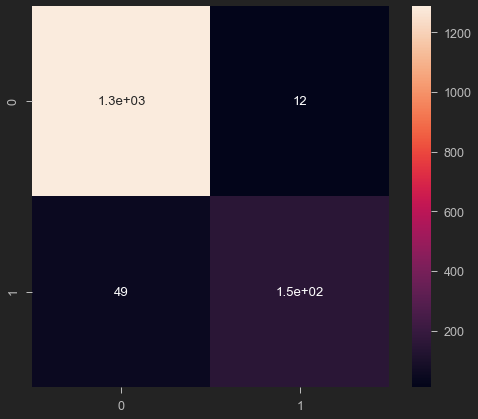

In [60]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

MINI CHALLENGE #6 SOLUTION:

Which of the following answers will be Euclidean distance between the two points A(1, 3) and B(2, 3)?

1. 2
2. 4
3. 1
4. 8

sqrt((1-2)^2 + (3-3)^2)= 1